# Compare metadata server performance

This notebook contains the analysis of parallel file system metadata server (MDS) performance across different HPC systems using the *mdtest* benchmark. The tests were conducted according to the US Trinity benchmark specfication:

* [NERSC mdtest benchmark description](http://www.nersc.gov/users/computational-systems/cori/nersc-8-procurement/trinity-nersc-8-rfp/nersc-8-trinity-benchmarks/mdtest/)

The source and build instructions for the mdtest benchmark can be found in the LANL IOR Github repo:

* [LANL IOR on Github](https://github.com/IOR-LANL/ior)

## Setup section

Import required python modules for the analysis

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,9)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})
sns.set_context("paper")

In [2]:
import sys
sys.path.append('../../../python-modules')
from synthanalysis import mdtest

In [3]:
cpn = {}
cores = {}
create = {}
stat = {}
remove = {}
sty = {}
systems = ['Cirrus','CSD3-Skylake','ARCHER']

## Setup the results file lists for the systems

It would be better to have a more general way of getting the results files but for this initial analysis we explicitly set the file names.

We have Cirrus and ARCHER results out to higher core counts but restrict to the range where we can compare to CSD3. The higher core counts continue the trends shown in these comparisons.

In [4]:
cir_files = {2:'../results/Cirrus/mdtest_{0}_1048576_2nodes_201711231231.log',
             4:'../results/Cirrus/mdtest_{0}_1048576_4nodes_201711231340.log',
             8:'../results/Cirrus/mdtest_{0}_1048576_8nodes_201711231400.log',
             16:'../results/Cirrus/mdtest_{0}_1048576_16nodes_201711231416.log',
             32:'../results/Cirrus/mdtest_{0}_1048576_32nodes_201711231427.log',
             }

In [5]:
csd3s_files = {2:'../results/CSD3Skylake/mdtest_{0}_1048576_2nodes_201711281530.log',
               4:'../results/CSD3Skylake/mdtest_{0}_1048576_4nodes_201711281506.log',
               8:'../results/CSD3Skylake/mdtest_{0}_1048576_8nodes_201711281428.log',
               16:'../results/CSD3Skylake/mdtest_{0}_1048576_16nodes_201711281628.log',
               32:'../results/CSD3Skylake/mdtest_{0}_1048576_32nodes_201711281514.log'
              }

In [6]:
archer_files = {2:'../results/ARCHER/mdtest_{0}_1048576_2nodes_201711250820.log',
               4:'../results/ARCHER/mdtest_{0}_1048576_4nodes_201711241001.log',
               8:'../results/ARCHER/mdtest_{0}_1048576_8nodes_201711232038.log',
               16:'../results/ARCHER/mdtest_{0}_1048576_16nodes_201711241108.log',
               32:'../results/ARCHER/mdtest_{0}_1048576_32nodes_201711241600.log'
              }

## Multiple processes creating files in single directory

In [7]:
test = 'mp-mf-sd'

In [8]:
sys = 'Cirrus'
key = '{0},{1}'.format(sys, test)
cpn[sys] = 36
sty[sys] = '^-'
cores[key], create[key], stat[key], remove[key] = mdtest.calcperf(cir_files, test, cpn[sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              72       10372.759       15338.753        7840.810
              4             144       20551.523       35219.239       10540.914
              8             288       36822.492       68579.723       18643.787
             16             576       45697.953      117750.326       27914.636
             32            1152       35363.762      152163.513       32398.233


In [9]:
sys = 'CSD3-Skylake'
key = '{0},{1}'.format(sys, test)
cpn[sys] = 32
sty[sys] = 'o-'
cores[key], create[key], stat[key], remove[key] = mdtest.calcperf(csd3s_files, test, cpn[sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              64       10447.905       15785.713        7996.072
              4             128       21623.942       28257.865        8869.195
              8             256       40588.567       65347.554       18597.795
             16             512       54151.757      116107.385       31821.267
             32            1024       43346.112      142800.723       37725.149


In [10]:
sys = 'ARCHER'
key = '{0},{1}'.format(sys, test)
cpn[sys] = 24
sty[sys] = 's-'
cores[key], create[key], stat[key], remove[key] = mdtest.calcperf(archer_files, test, cpn[sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              48        4681.425        6508.458        1571.340
              4              96        8078.051        9034.181        2478.424
              8             192        8391.703       18867.906        2805.547
             16             384       12941.012       19603.802        3133.693
             32             768        5581.860       16226.720        2579.830


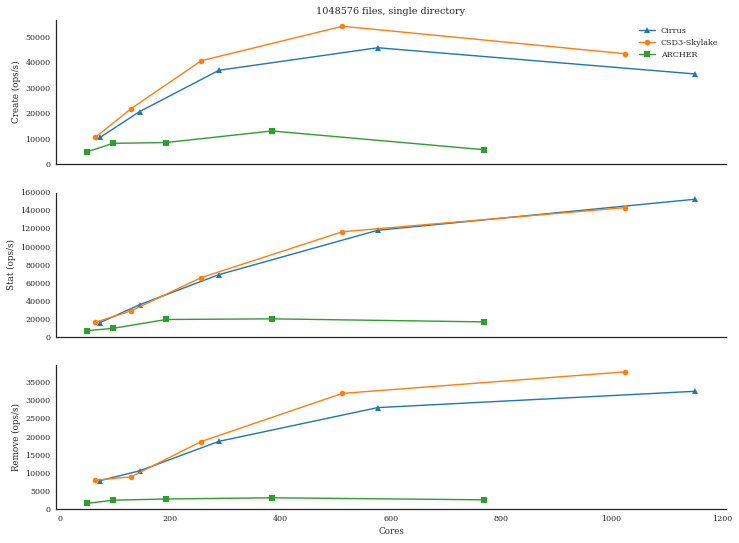

In [11]:
ax1 = plt.subplot(311)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], create[key], sty[system], label=system)
plt.title('1048576 files, single directory')
plt.ylim(ymin=0)
plt.ylabel('Create (ops/s)')
plt.legend(loc='best')
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(312, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], stat[key], sty[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Stat (ops/s)')
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.xaxis.set_visible(False)
ax3 = plt.subplot(313, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], remove[key], sty[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Remove (ops/s)')
plt.xlabel('Cores')
sns.despine()
# plt.savefig("mdtest_mp-mf-sd.png", dpi=300)


In [12]:
print("Maximum performance:")
print("{:>15s} {:>15s} {:>15s} {:>15s}".format('System', 'Create (ops/s)', 'Stat (ops/s)', 'Remove (ops/s)'))
print("{:>15s} {:>15s} {:>15s} {:>15s}".format('======', '==============', '============', '=============='))
for system in systems:
    key = '{0},{1}'.format(system, test)
    print("{:>15s} {:>15.3f} {:>15.3f} {:>15.3f}".format(system, max(create[key]), max(stat[key]), max(remove[key])))

Maximum performance:
         System  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
         ======  ==============    ============  ==============
         Cirrus       45697.953      152163.513       32398.233
   CSD3-Skylake       54151.757      142800.723       37725.149
         ARCHER       12941.012       19603.802        3133.693


## Multiple processes creating files in multiple directories

In [13]:
test = 'mp-mf-md'

In [14]:
sys = 'Cirrus'
key = '{0},{1}'.format(sys, test)
cores[key], create[key], stat[key], remove[key] = mdtest.calcperf(cir_files, test, cpn[sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              72       12978.440      148081.027        8529.599
              4             144       24672.351      160014.067       15644.586
              8             288       38695.939      144716.291       24817.168
             16             576       53810.573      156742.952       31643.325
             32            1152       51713.201      142344.017       30412.522


In [15]:
sys = 'CSD3-Skylake'
key = '{0},{1}'.format(sys, test)
cores[key], create[key], stat[key], remove[key] = mdtest.calcperf(csd3s_files, test, cpn[sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              64       26640.390      137201.081       25408.338
              4             128       43342.066      152180.682       29893.034
              8             256       62296.105      228447.780       39188.278
             16             512       62948.188      174903.377       35492.293
             32            1024       59117.056      171432.169       38115.906


In [16]:
sys = 'ARCHER'
key = '{0},{1}'.format(sys, test)
cores[key], create[key], stat[key], remove[key] = mdtest.calcperf(archer_files, test, cpn[sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              48        4878.045        7665.408        1993.050
              4              96        8893.743       17464.946        3119.114
              8             192        9633.525       27970.244        3510.650
             16             384       14062.439       18519.501        3731.414
             32             768        6247.791       10757.108        2424.931


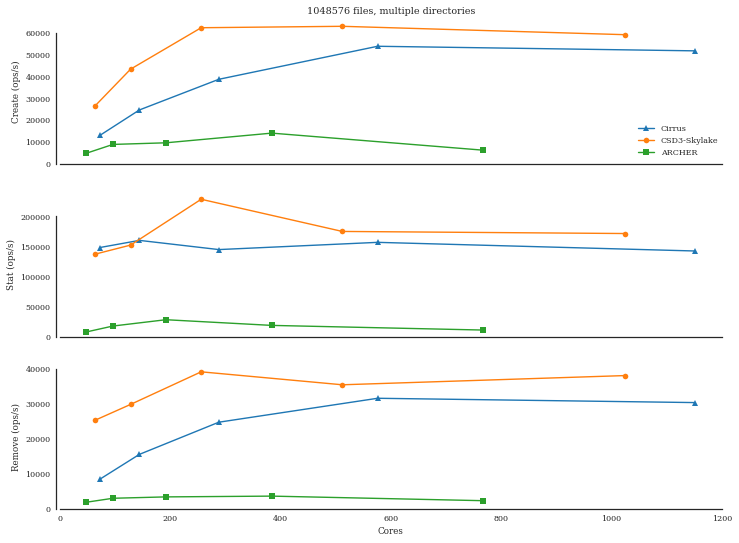

In [17]:
ax1 = plt.subplot(311)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], create[key], sty[system], label=system)
plt.title('1048576 files, multiple directories')
plt.ylim(ymin=0)
plt.ylabel('Create (ops/s)')
plt.legend(loc='best')
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(312, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], stat[key], sty[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Stat (ops/s)')
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.xaxis.set_visible(False)
ax3 = plt.subplot(313, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], remove[key], sty[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Remove (ops/s)')
plt.xlabel('Cores')
sns.despine(trim=True)
# plt.savefig("mdtest_mp-mf-md.png", dpi=300)


In [18]:
print("Maximum performance:")
print("{:>15s} {:>15s} {:>15s} {:>15s}".format('System', 'Create (ops/s)', 'Stat (ops/s)', 'Remove (ops/s)'))
print("{:>15s} {:>15s} {:>15s} {:>15s}".format('======', '==============', '============', '=============='))
for system in systems:
    key = '{0},{1}'.format(system, test)
    print("{:>15s} {:>15.3f} {:>15.3f} {:>15.3f}".format(system, max(create[key]), max(stat[key]), max(remove[key])))

Maximum performance:
         System  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
         ======  ==============    ============  ==============
         Cirrus       53810.573      160014.067       31643.325
   CSD3-Skylake       62948.188      228447.780       39188.278
         ARCHER       14062.439       27970.244        3731.414


## Multiple processes creating single file in single directory

In [19]:
test = 'mp-sf-sd'

In [20]:
sys = 'Cirrus'
key = '{0},{1}'.format(sys, test)
cpn[sys] = 36
sty[sys] = '^-'
cores[key], create[key], stat[key], remove[key] = mdtest.calcperf(cir_files, test, cpn[sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              72        8975.731       70350.098      144360.022
              4             144       15472.888       88224.553      251992.302
              8             288       18145.475       62330.264      432280.133
             16             576       18056.868       40375.868      479889.082
             32            1152       26907.952       99330.674      420896.807


In [21]:
sys = 'CSD3-Skylake'
key = '{0},{1}'.format(sys, test)
cpn[sys] = 36
sty[sys] = '^-'
cores[key], create[key], stat[key], remove[key] = mdtest.calcperf(csd3s_files, test, cpn[sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              72        2323.654         286.733      124275.674
              4             144       17713.835       81430.443      400052.841
              8             288       25129.700      141059.094      556631.324
             16             576       37160.768      179645.612      866270.128
             32            1152       38193.443      177316.790      599939.558


In [23]:
sys = 'ARCHER'
key = '{0},{1}'.format(sys, test)
cores[key], create[key], stat[key], remove[key] = mdtest.calcperf(archer_files, test, cpn[sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              48        3959.381       52634.403       77792.346
              4              96        9385.199       89062.859      161643.189
              8             192       14784.130      193722.966      309733.218
             16             384       17188.853      338648.599      358870.930
             32             768       23608.234      330043.593      317612.450


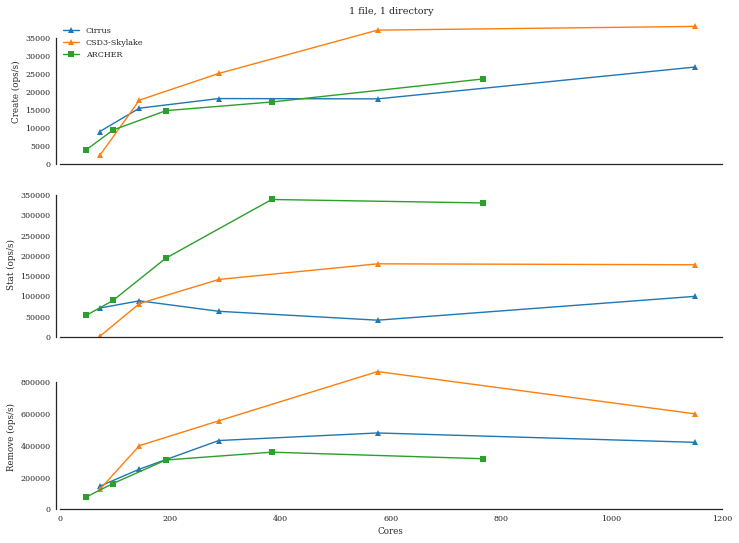

In [24]:
ax1 = plt.subplot(311)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], create[key], sty[system], label=system)
plt.title('1 file, 1 directory')
plt.ylim(ymin=0)
plt.ylabel('Create (ops/s)')
plt.legend(loc='best')
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(312, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], stat[key], sty[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Stat (ops/s)')
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.xaxis.set_visible(False)
ax3 = plt.subplot(313, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], remove[key], sty[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Remove (ops/s)')
plt.xlabel('Cores')
sns.despine(trim=True)
# plt.savefig("mdtest_mp-mf-md.png", dpi=300)


In [25]:
print("Maximum performance:")
print("{:>15s} {:>15s} {:>15s} {:>15s}".format('System', 'Create (ops/s)', 'Stat (ops/s)', 'Remove (ops/s)'))
print("{:>15s} {:>15s} {:>15s} {:>15s}".format('======', '==============', '============', '=============='))
for system in systems:
    key = '{0},{1}'.format(system, test)
    print("{:>15s} {:>15.3f} {:>15.3f} {:>15.3f}".format(system, max(create[key]), max(stat[key]), max(remove[key])))

Maximum performance:
         System  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
         ======  ==============    ============  ==============
         Cirrus       26907.952       99330.674      479889.082
   CSD3-Skylake       38193.443      179645.612      866270.128
         ARCHER       23608.234      338648.599      358870.930
